# "Shop Customer Data"
## A [Kaggle Dataset](https://www.kaggle.com/datasets/datascientistanna/customers-dataset)
Shop Customer Data is a detailed analysis of a imaginative shop's ideal customers. It helps a business to better understand its customers. The owner of a shop gets information about Customers through membership cards.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [3]:
# Rename columns for convenient dot notation
column_mapper = {
    'CustomerID': 'id',
    'Gender': 'gender',
    'Age': 'age',
    'Annual Income ($)': 'income',
    'Spending Score (1-100)': 'spending_score',
    'Profession': 'profession',
    'Work Experience': 'work_experience',
    'Family Size': 'family_size'
}
customers = df.rename(mapper = column_mapper, axis = 1)

customers.head()

,id,gender,age,income,spending_score,profession,work_experience,family_size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


## Gender

In [4]:
customers.gender.value_counts()

Female    1186
Male       814
Name: gender, dtype: int64

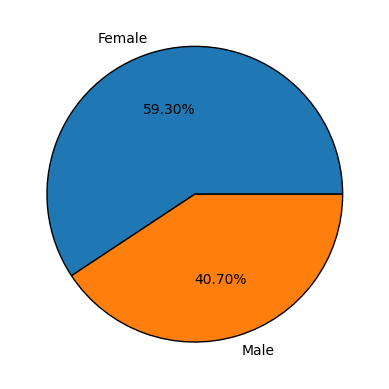

In [5]:
y = np.array([(1186/2000), (814/2000)])
pie_labels = ['Female', 'Male']

plt.pie(y, labels = pie_labels, wedgeprops = {'edgecolor':'black'}, autopct = '%.2f%%')
plt.show()

## Age Range

In [6]:
customers.age.describe()

count    2000.000000
mean       48.960000
std        28.429747
min         0.000000
25%        25.000000
50%        48.000000
75%        73.000000
max        99.000000
Name: age, dtype: float64

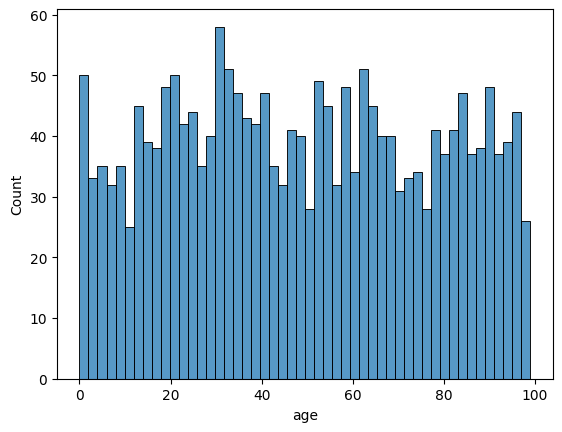

In [7]:
plt.clf()

sns.histplot(customers.age, edgecolor = 'black', bins = 50)
plt.show()

In [8]:
# I will occasionally print out the 'head' of the dataset to avoid scrolling to the top
customers.head()

,id,gender,age,income,spending_score,profession,work_experience,family_size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


## Income Spread

In [9]:
customers.income.describe()

count      2000.000000
mean     110731.821500
std       45739.536688
min           0.000000
25%       74572.000000
50%      110045.000000
75%      149092.750000
max      189974.000000
Name: income, dtype: float64

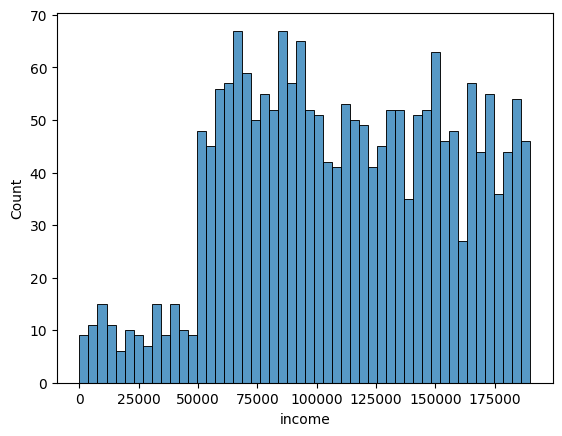

In [10]:
plt.clf()

sns.histplot(customers.income, edgecolor = 'black', bins = 50)
plt.show()

There's a curious spike in the number of customers with a salary of approximately $50,000 or greater.

## Spending Score

In [11]:
customers.spending_score.describe()

count    2000.000000
mean       50.962500
std        27.934661
min         0.000000
25%        28.000000
50%        50.000000
75%        75.000000
max       100.000000
Name: spending_score, dtype: float64

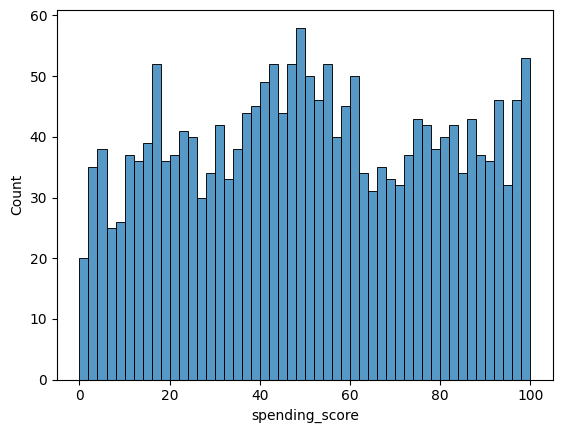

In [12]:
plt.clf()

sns.histplot(customers.spending_score, edgecolor = 'black', bins = 50)
plt.show()

In [13]:
customers.head()

,id,gender,age,income,spending_score,profession,work_experience,family_size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


## Variety of Professions

In [21]:
customers.profession.value_counts()

Artist           612
Healthcare       339
Entertainment    234
Engineer         179
Doctor           161
Executive        153
Lawyer           142
Marketing         85
Homemaker         60
Name: profession, dtype: int64

In [24]:
customers.profession.isna().value_counts()

False    1965
True       35
Name: profession, dtype: int64

In [38]:
profession_null = customers[customers.profession.isna() == True]
profession_null.head()

,id,gender,age,income,spending_score,profession,work_experience,family_size
79,80,Female,49,98000,42,NaN,1,1
118,119,Female,51,84000,43,NaN,2,7
219,220,Female,59,76000,61,NaN,9,1
237,238,Male,95,36000,35,NaN,0,4
437,438,Male,76,136259,14,NaN,0,7


In [37]:
profession_null.describe()

,id,age,income,spending_score,work_experience,family_size
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,1011.171429,52.628571,117233.828571,44.428571,4.657143,4.400000
std,528.974562,29.439955,40129.777321,24.924929,3.685766,2.032095
min,80.000000,0.000000,36000.000000,3.000000,0.000000,1.000000
25%,622.000000,26.500000,89422.000000,23.000000,1.000000,3.000000
50%,1010.000000,58.000000,121377.000000,42.000000,5.000000,4.000000
75%,1401.500000,75.000000,147630.000000,65.500000,7.000000,6.000000
max,1933.000000,99.000000,186655.000000,87.000000,12.000000,7.000000


In [51]:
# We can deduce that null values for 'profession' indicate unemployment

customers.profession.fillna('Unemployed', inplace = True)
customers.profession.value_counts()

Artist           612
Healthcare       339
Entertainment    234
Engineer         179
Doctor           161
Executive        153
Lawyer           142
Marketing         85
Homemaker         60
Unemployed        35
Name: profession, dtype: int64

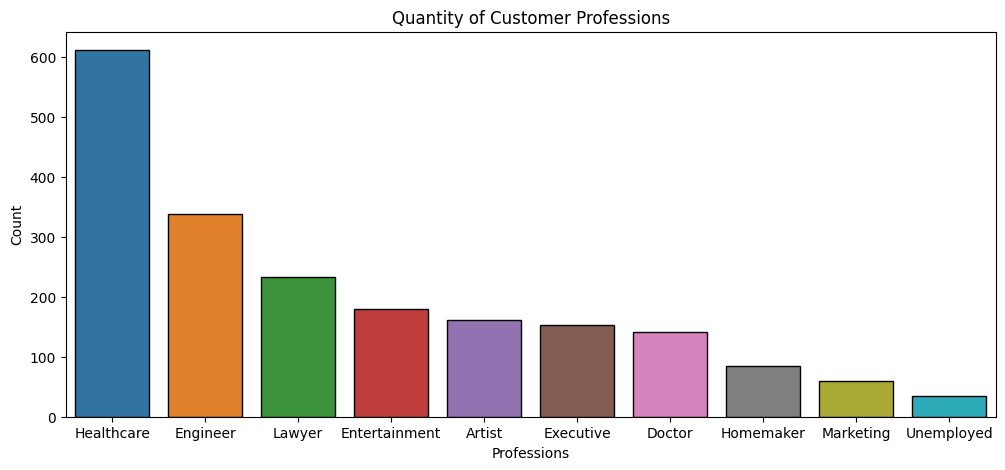

In [50]:
profession_labels = customers.profession.unique()
profession_count = list(customers.profession.value_counts())

plt.figure(figsize = (12,5))
sns.barplot(x = profession_labels, y = profession_count, edgecolor = 'black')
plt.title('Quantity of Customer Professions')
plt.xlabel('Professions')
plt.ylabel('Count')
plt.show()

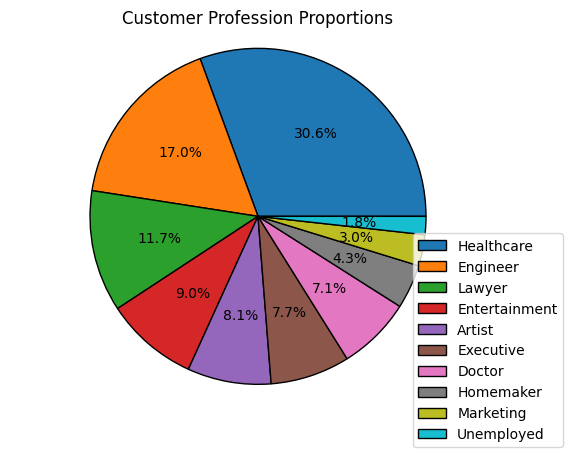

In [57]:
# Crowded pie chart

customer_pie_sum = np.sum(profession_count)
customer_pie_slices = [(x/customer_pie_sum) for x in profession_count]

plt.clf()

plt.pie(customer_pie_slices, wedgeprops = {'edgecolor':'black'}, autopct = '%.1f%%')
plt.title('Customer Profession Proportions')
plt.legend(profession_labels, bbox_to_anchor = (1,0),
           loc = 'lower right', bbox_transform=plt.gcf().transFigure)
plt.axis('equal')
plt.show()

## Spread of Work Experience

In [16]:
customers.work_experience.describe()

count    2000.000000
mean        4.102500
std         3.922204
min         0.000000
25%         1.000000
50%         3.000000
75%         7.000000
max        17.000000
Name: work_experience, dtype: float64

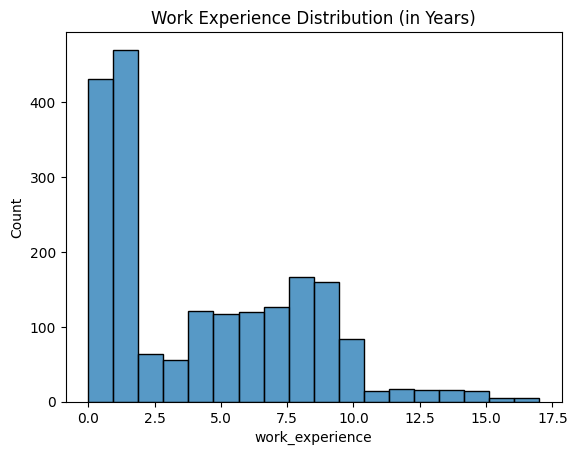

In [59]:
plt.clf()

sns.histplot(customers.work_experience, edgecolor = 'black', bins = 18)
plt.title('Work Experience Distribution (in Years)')
plt.show()

Customers with less than two years of work experience are the most plentiful demographic.

In [18]:
customers.head()

,id,gender,age,income,spending_score,profession,work_experience,family_size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


## Family Size

In [19]:
customers.family_size.describe()

count    2000.000000
mean        3.768500
std         1.970749
min         1.000000
25%         2.000000
50%         4.000000
75%         5.000000
max         9.000000
Name: family_size, dtype: float64

In [20]:
customers.family_size.value_counts().sort_index()

1    299
2    361
3    311
4    289
5    258
6    243
7    234
8      4
9      1
Name: family_size, dtype: int64

<Figure size 640x480 with 0 Axes>

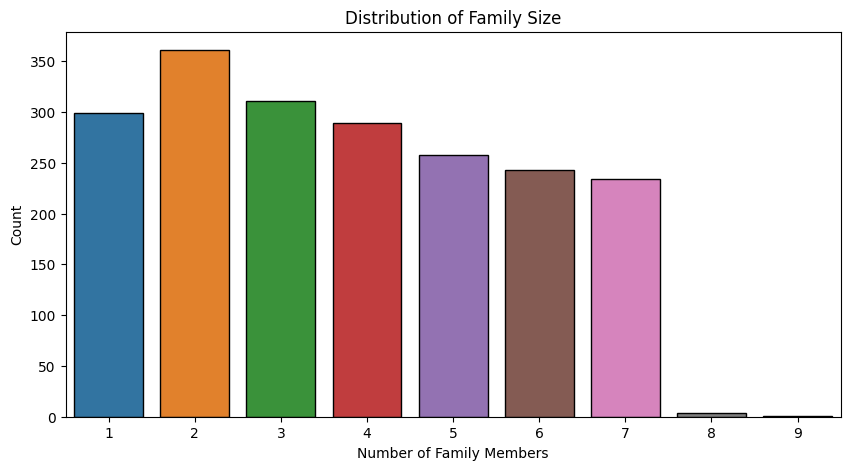

In [64]:
family_members_count = np.array(customers.family_size.value_counts().sort_index())
family_members = [x for x in range(1,10)]

plt.clf()

ax.set_xticks([x for x in range(1,10)])

plt.figure(figsize = (10, 5))
sns.barplot(x = family_members, y = family_members_count, edgecolor = 'black')
plt.title('Distribution of Family Size')
plt.xlabel('Number of Family Members')
plt.ylabel('Count')
plt.show()

# Exploration of Relationships Between Variabless

## Relationship Between Gender and Income

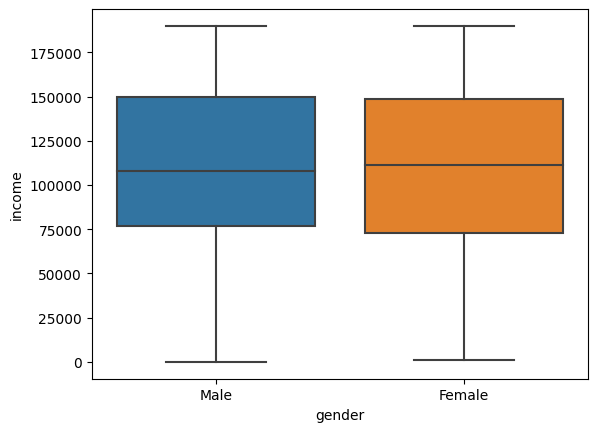

In [22]:
plt.clf()

sns.boxplot(x = customers.gender, y = customers.income)
plt.show()

In [23]:
from scipy.stats import ttest_ind

income_male = customers.income[customers.gender == 'Male']
income_female = customers.income[customers.gender == 'Female']

tstat, pval = ttest_ind(income_male, income_female)
print('P-value:', pval)

P-value: 0.8335720756307785


This p-value indicates (as do the box plots) that in this sample data, there is no significant difference in income between men and women.

## Relationship Between Age and Spending Score

In [24]:
customers.head()

,id,gender,age,income,spending_score,profession,work_experience,family_size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


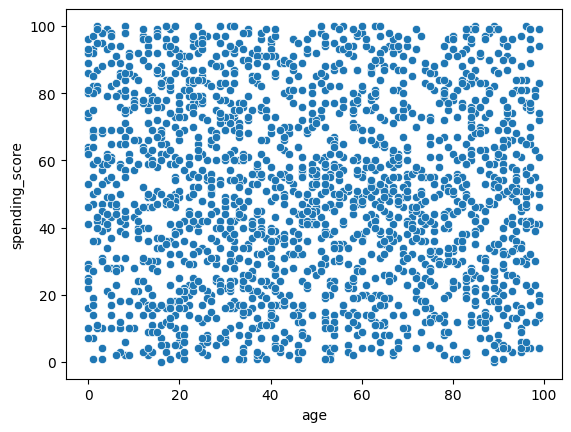

In [25]:
plt.clf()

sns.scatterplot(x = customers.age, y = customers.spending_score)
plt.show()

## Relationship Between Profession and Income

<Figure size 640x480 with 0 Axes>

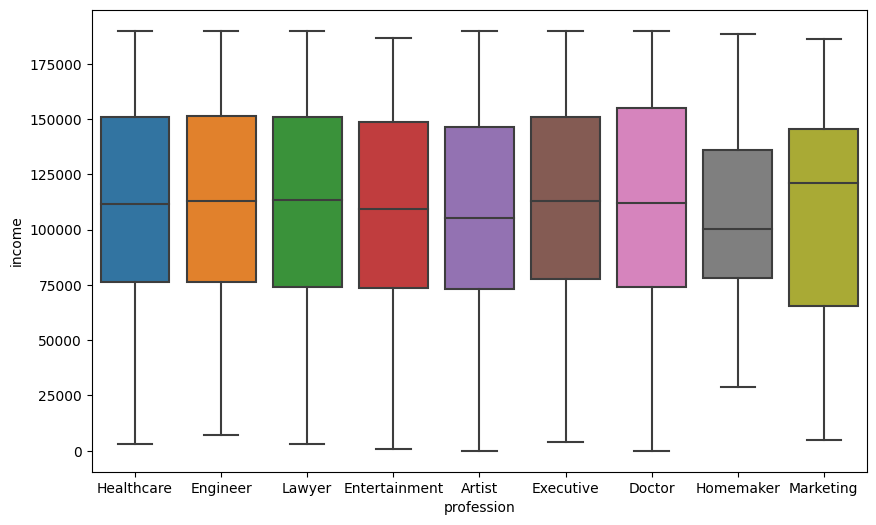

In [26]:
plt.clf()

fig, ax = plt.subplots(figsize = (10, 6))
sns.boxplot(x = customers.profession, y = customers.income)
plt.show()

In [27]:
# Gather incomes from each group of customers with different professions

healthcare_income = customers.income[customers.profession == 'Healthcare']
engineer_income = customers.income[customers.profession == 'Engineer']
lawyer_income = customers.income[customers.profession == 'Lawyer']
entertainment_income = customers.income[customers.profession == 'Entertainment']
artist_income = customers.income[customers.profession == 'Artist']
executive_income = customers.income[customers.profession == 'Executive']
doctor_income = customers.income[customers.profession == 'Doctor']
homemaker_income = customers.income[customers.profession == 'Homemaker']
marketing_income = customers.income[customers.profession == 'Marketing']

In [28]:
# ANOVA Test
from scipy.stats import f_oneway

fstat, pval = f_oneway(
    healthcare_income,
    engineer_income,
    lawyer_income,
    entertainment_income,
    artist_income,
    executive_income,
    doctor_income,
    homemaker_income,
    marketing_income
)
print('P-value for ANOVA:', pval)

P-value for ANOVA: 0.9459421854253084


The conclusion we can draw from this p-value is that *there are no significant differences in income* among these group pairings. Therefore, there is no need to find those pairings using the Tukey Range Test. We used ANOVA to keep the Type I error rate at 0.05, rather than performing multiple Two-Sample T-Tests, which only increases the Type I error rate.

## Relationship Between Profession and Spending Score

<Figure size 640x480 with 0 Axes>

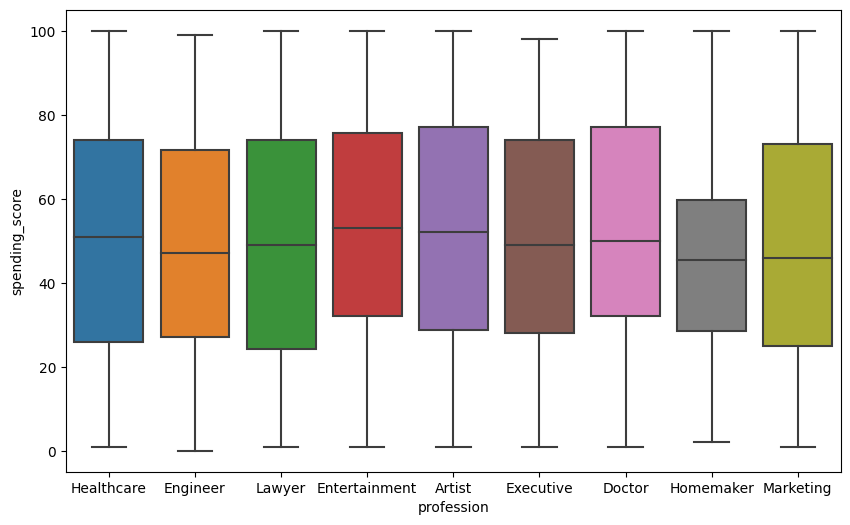

In [29]:
plt.clf()

fig, ax = plt.subplots(figsize = (10, 6))
sns.boxplot(x = customers.profession, y = customers.spending_score)
plt.show()

In [30]:
# Gather spending scores from each group of customers with different professions

healthcare_ss = customers.spending_score[customers.profession == 'Healthcare']
engineer_ss = customers.spending_score[customers.profession == 'Engineer']
lawyer_ss = customers.spending_score[customers.profession == 'Lawyer']
entertainment_ss = customers.spending_score[customers.profession == 'Entertainment']
artist_ss = customers.spending_score[customers.profession == 'Artist']
executive_ss = customers.spending_score[customers.profession == 'Executive']
doctor_ss = customers.spending_score[customers.profession == 'Doctor']
homemaker_ss = customers.spending_score[customers.profession == 'Homemaker']
marketing_ss = customers.spending_score[customers.profession == 'Marketing']

In [31]:
# ANOVA Test

fstat, pval = f_oneway(
    healthcare_ss,
    engineer_ss,
    lawyer_ss,
    entertainment_ss,
    artist_ss,
    executive_ss,
    doctor_ss,
    homemaker_ss,
    marketing_ss
)
print('P-value for ANOVA:', pval)

P-value for ANOVA: 0.45447910734598096


The conclusion we can draw from this p-value is that there are *no significant differences in spending scores* among these group pairings. Therefore, there is no need to find those pairings using the Tukey Range Test.

In [32]:
customers.head()

,id,gender,age,income,spending_score,profession,work_experience,family_size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


## Relationship Between Gender and Profession

In [33]:
gender_profession_contingency = pd.crosstab(customers.gender, customers.profession)
gender_profession_contingency

profession,Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing
gender,,,,,,,,,
Female,380,89,103,133,87,196,39,86,53
Male,232,72,76,101,66,143,21,56,32


In [105]:
# Chi-Square Test (two categorical variables)
from scipy.stats import chi2_contingency

chi2, pval, dof, expected = chi2_contingency(gender_profession_contingency)
print('P-value:', pval)

P-value: 0.671057197989452
